### Random Forest importance
Random forests is one the most popular machine learning algorithms. It is so successful because it provide good predictive performance, low overfitting and easy interpretability. This interpretability is given by the fact that it is straightforward to derive the importance of each variable on the tree decision. In other words, it is easy to compute how much each variable is contributing to the decision.

Random forests consist typically of 4-12 hundred decision trees, each of them built over a random extraction of the observations from the dataset and a random extraction of the features. Not every tree sees all the features or all the observations, and this guarantees that the trees are de-correlated and therefore less prone to over-fitting. Each tree is also a sequence of yes-no questions based on a single or a combination of features. At each node (that is, at each question), the three divides the dataset in 2 buckets, each of them hosting observations that are more similar among themselves and different from the ones in the other bucket. Therefore, the importance of each feature is derived by how "pure" each of the buckets is.

For classification, the measure of impurity is either Gini or the entropy. For regression the measure of impurity is the variance. When training a tree, it is possible to compute how much each feature decreases the impurity. The more a feature decreases the impurity, the more important the feature is. In random forests, the impurity decrease elicited by each feature is averaged across trees to determine the final importance of the variable.

In general, features that are selected at the top of the trees are more important than features that are selected at the end nodes of the trees, as generally the top splits lead to bigger information gains.

Note

**Random Forests and decision trees in general give preference to features with high cardinality**
**Correlated features will be given equal or similar importance, but overall reduced importance compared to the same tree built without correlated counterparts.**


In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.feature_selection import SelectFromModel

### Classification

In [2]:
df = pd.read_csv('../data/dataset_2.csv')
df.shape

(50000, 109)

In [3]:
df.head()

,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,...,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109
0,4.532710,3.280834,17.982476,4.404259,2.349910,0.603264,2.784655,0.323146,12.009691,0.139346,5.751633,2.808895,1.244055,11.269688,15.866550,...,4.662407e-01,7.273476,0.623398,2.070677,1.108609,2.079066,6.748819,2.941445,18.360496,17.726613,7.774031,1.473441,1.973832,0.976806,2.541417
1,5.821374,12.098722,13.309151,4.125599,1.045386,1.832035,1.833494,0.709090,8.652883,0.102757,8.225109,2.001220,8.081647,3.933986,14.350374,...,9.585002e-01,6.475936,1.230876,2.249656,0.615216,2.479789,7.795290,3.557890,17.383378,15.193423,8.263673,1.878108,0.567939,1.018818,1.416433
2,1.938776,7.952752,0.972671,3.459267,1.935782,0.621463,2.338139,0.344948,9.937850,11.691283,8.307318,3.239122,2.699376,10.030416,14.977220,...,1.426163e+00,7.552225,0.599195,1.872145,2.111624,1.861487,6.130886,3.401064,15.850471,14.620599,6.849776,1.098210,1.959183,1.575493,1.857893
3,6.020690,9.900544,17.869637,4.366715,1.973693,2.026012,2.853025,0.674847,11.816859,0.011151,5.769939,2.760518,4.067190,14.040960,15.363394,...,7.226496e-01,7.237598,0.643228,1.168033,1.222773,1.340944,7.240058,2.417235,15.194609,13.553772,7.229971,0.835158,2.234482,0.946170,2.700606
4,3.909506,10.576516,0.934191,3.419572,1.871438,3.340811,1.868282,0.439865,13.585620,1.153366,9.297974,1.682118,9.553305,10.341188,9.436362,...,6.676273e-07,5.777892,2.743704,2.700285,1.897730,2.738095,6.565509,4.341414,15.893832,11.929787,6.954033,1.853364,0.511027,2.599562,0.811364


### Remember
In all feature selection procedures, it is good practice to select the features by examining only the training set. And this is to avoid overfit.



In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(labels = ['target'], axis = 1),
    df['target'],
    train_size=0.7,
    random_state = 0)

X_train.shape, X_test.shape

((35000, 108), (15000, 108))

### Select features with Tree

In [6]:
# we Will fit Random Forests and select features 

# For that we will use selectFromModel class from sklearn
# to automatically select the features

# SelectFrom model will select those features that has importance
# greater than the mean importance of all the features by default.
# We can alter this threshold if you want to
# n_estimators - number of trees in the forest
sel_ = SelectFromModel(RandomForestClassifier(n_estimators=10, random_state=0))
sel_.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(n_estimators=10,
                                                 random_state=0))

In [7]:
# features that were selected.

# sklearn will select those features which importance values
# are greater than the mean of all the coefficients.

sel_.get_support()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False,  True,  True, False, False, False, False, False, False,
       False, False,  True,  True, False,  True,  True,  True, False,
       False,  True, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
        True, False, False, False, False, False, False, False, False,
       False, False,  True, False,  True,  True,  True, False,  True,
       False, False, False, False, False, False, False,  True,  True,
       False, False, False,  True,  True,  True, False, False, False,
        True, False, False, False,  True, False, False, False, False,
       False, False,  True, False, False, False,  True,  True, False])

In [8]:
# let's make a list and count the selected features

selected_feat = X_train.columns[(sel_.get_support())]

len(selected_feat)

27

In [9]:
selected_feat

Index(['var_16', 'var_20', 'var_21', 'var_30', 'var_31', 'var_33', 'var_34',
       'var_35', 'var_38', 'var_41', 'var_54', 'var_55', 'var_67', 'var_69',
       'var_70', 'var_71', 'var_73', 'var_81', 'var_82', 'var_86', 'var_87',
       'var_88', 'var_92', 'var_96', 'var_103', 'var_107', 'var_108'],
      dtype='object')

### Plot importances

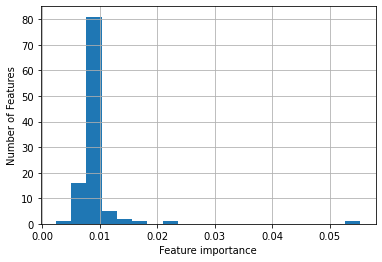

In [25]:

# and now let's plot the distribution of importances

# Ravel will flatten the series
pd.Series(sel_.estimator_.feature_importances_.ravel()).hist(bins=20)
plt.xlabel('Feature importance')
plt.ylabel('Number of Features')
plt.show()

In [26]:
# and now, let's compare the  amount of selected features
# with the amount of features which importance is above the
# mean of all features, to make sure we understand the output of
# SelectFromModel

print('total features: {}'.format((X_train.shape[1])))

print('selected features: {}'.format(len(selected_feat)))

total features: 108
selected features: 27


In [32]:

len(sel_.estimator_.feature_importances_)

108

In [34]:
sel_.estimator_.feature_importances_

array([0.00834856, 0.00793609, 0.00789585, 0.00897433, 0.00751834,
       0.00870615, 0.00858119, 0.00905821, 0.00884905, 0.00771888,
       0.00915479, 0.00822345, 0.00898097, 0.00883445, 0.00900294,
       0.00976811, 0.00892364, 0.00774007, 0.00885912, 0.01105934,
       0.01133709, 0.00681211, 0.00830223, 0.00830459, 0.00839332,
       0.00868279, 0.00809618, 0.00751886, 0.0090602 , 0.01643342,
       0.01096255, 0.00741806, 0.00940478, 0.01505742, 0.00980123,
       0.00799796, 0.00652943, 0.00992819, 0.00750595, 0.00844972,
       0.00999719, 0.00790028, 0.00764606, 0.00871899, 0.00568172,
       0.00903479, 0.00804648, 0.00773065, 0.00783022, 0.00873122,
       0.00817612, 0.00752646, 0.00924483, 0.00929936, 0.05537022,
       0.00641035, 0.00693599, 0.00856578, 0.00770724, 0.00776184,
       0.00782914, 0.00808956, 0.00871135, 0.0084891 , 0.00899193,
       0.00938829, 0.00906921, 0.0102396 , 0.01322372, 0.00967303,
       0.00785581, 0.01017561, 0.00771478, 0.00837578, 0.00925

In [33]:
sel_.estimator_.feature_importances_.mean()

0.009259259259259259

In [37]:
sel_.estimator_.feature_importances_ >sel_.estimator_.feature_importances_.mean()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False,  True,  True, False, False, False, False, False, False,
       False, False,  True,  True, False,  True,  True,  True, False,
       False,  True, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
        True, False, False, False, False, False, False, False, False,
       False, False,  True, False,  True,  True,  True, False,  True,
       False, False, False, False, False, False, False,  True,  True,
       False, False, False,  True,  True,  True, False, False, False,
        True, False, False, False,  True, False, False, False, False,
       False, False,  True, False, False, False,  True,  True, False])

In [35]:
print(
    'features with importance greater than the mean importance of all features: {}'.format(
        np.sum(sel_.estimator_.feature_importances_ >
               sel_.estimator_.feature_importances_.mean())))

features with importance greater than the mean importance of all features: 27


In [38]:
# and now, let's compare the  amount of selected features
# with the amount of features which importance is above the
# mean of all features, to make sure we understand the output of
# SelectFromModel

print('total features: {}'.format((X_train.shape[1])))

print('selected features: {}'.format(len(selected_feat)))

print(
    'features with importance greater than the mean importance of all features: {}'.format(
        np.sum(sel_.estimator_.feature_importances_ >
               sel_.estimator_.feature_importances_.mean())))

total features: 108
selected features: 27
features with importance greater than the mean importance of all features: 27


**A few things to note:**

If we change the parameters of the tree, we may obtain different features
How many features to select is somewhat arbitrary
With SelectFromModel we use the mean of all importances as threshold. We can modify this threshold within the SelectFromModel if we want more or less features.

### Regression


In [41]:
# load dataset
data = pd.read_csv('../data/houseprice.csv')
data.shape

(1460, 81)

In [42]:
# In practice, feature selection should be done after data pre-processing,
# so ideally, all the categorical variables are encoded into numbers,
# and then you can assess how deterministic they are of the target

# here for simplicity I will use only numerical variables
# select numerical columns:

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_vars = list(data.select_dtypes(include=numerics).columns)
data = data[numerical_vars]
data.shape

(1460, 38)

In [44]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['SalePrice'], axis=1),
    data['SalePrice'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((1022, 37), (438, 37))

In [45]:
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)

In [46]:
# we train a random forest for regression and select features

# SelectFrom model will select those features which importance
# is greater than the mean importance of all the features
# by default, but you can alter this threshold if you want to

sel_ = SelectFromModel(RandomForestRegressor(n_estimators=100, random_state=10))
sel_.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestRegressor(random_state=10))

In [47]:
# let's make a list and count the selected features
selected_feat = X_train.columns[(sel_.get_support())]
len(selected_feat)

5

In [49]:
selected_feat

Index(['OverallQual', 'BsmtFinSF1', 'TotalBsmtSF', 'GrLivArea', 'GarageCars'], dtype='object')

In [48]:
# and now, let's compare the  amount of selected features
# with the amount of features which importance is above the
# mean importance, to make sure we understand the output of
# sklearn

print('total features: {}'.format((X_train.shape[1])))

print('selected features: {}'.format(len(selected_feat)))

print(
    'features with coefficients greater than the mean coefficient: {}'.format(
        np.sum(sel_.estimator_.feature_importances_ >
               sel_.estimator_.feature_importances_.mean())))

total features: 37
selected features: 5
features with coefficients greater than the mean coefficient: 5


Selecting features by using tree derived feature importance is a very straightforward, fast and generally accurate way of selecting good features for machine learning. In particular, if you are going to build tree methods.

However, as I said, correlated features will show in a tree similar importance, but lower than compared to what their importance would be if the tree was built without the correlated counterparts.

In situations like this, it is better to select features recursively, rather than altogether like we are doing here